In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "C:/Users/ArbiaBejaoui/Udemy ML Kurs/13 - Case Study/3 - Case Study Income/1 - Lösung/Startups2014.xlsx"
df = pd.read_excel(path)

(array([1.2001e+04, 4.2900e+02, 1.5200e+02, 5.5000e+01, 5.4000e+01,
        3.3000e+01, 1.5000e+01, 9.0000e+00, 8.0000e+00, 6.0000e+00]),
 array([3.17000000e+02, 1.80502853e+07, 3.61002536e+07, 5.41502219e+07,
        7.22001902e+07, 9.02501585e+07, 1.08300127e+08, 1.26350095e+08,
        1.44400063e+08, 1.62450032e+08, 1.80500000e+08]),
 <a list of 10 Patch objects>)

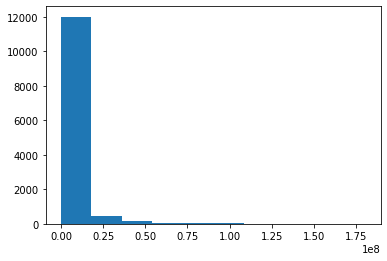

In [3]:
#histogramm of continious nummerical variables
num_bins=10
plt.hist(df['funding_total_usd'],num_bins)

In [4]:
df.describe()


,funding_total_usd,funding_rounds,founded_year,Company age
count,1.276200e+04,12762.000000,12762.000000,12762.000000
mean,4.624033e+06,1.718539,2011.596145,2.403855
std,1.285220e+07,1.076750,1.163081,1.163081
min,3.170000e+02,1.000000,2010.000000,0.000000
25%,1.633090e+05,1.000000,2011.000000,2.000000
50%,8.000000e+05,1.000000,2012.000000,2.000000
75%,3.016992e+06,2.000000,2012.000000,3.000000
max,1.805000e+08,12.000000,2014.000000,4.000000


In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sk_totalfunding=scaler.fit_transform((df['funding_total_usd'].values.reshape(-1,1)))
df['fundingtotal_sca']=sk_totalfunding
df[['funding_total_usd','fundingtotal_sca']].describe().round(3)

,funding_total_usd,fundingtotal_sca
count,1.276200e+04,12762.000
mean,4.624033e+06,0.000
std,1.285220e+07,1.000
min,3.170000e+02,-0.360
25%,1.633090e+05,-0.347
50%,8.000000e+05,-0.298
75%,3.016992e+06,-0.125
max,1.805000e+08,13.685


In [6]:
def find_outliers(col):
    from scipy import stats
    z=np.abs(stats.zscore(col))
    idx_outliers=np.where (z>3,True,False)
    return pd.Series(idx_outliers,index=col.index)
idx=find_outliers(df['funding_total_usd'])
idx

0        False
1        False
2        False
3        False
4        False
         ...  
12757    False
12758    False
12759    False
12760    False
12761    False
Length: 12762, dtype: bool

In [7]:
display(df.loc[idx==True].describe().round(3))

,funding_total_usd,funding_rounds,founded_year,Company age,fundingtotal_sca
count,2.410000e+02,241.000,241.000,241.000,241.000
mean,7.969978e+07,3.133,2010.979,3.021,5.842
std,3.109049e+07,1.463,1.058,1.058,2.419
min,4.350000e+07,1.000,2010.000,0.000,3.025
25%,5.400000e+07,2.000,2010.000,2.000,3.842
50%,7.350000e+07,3.000,2011.000,3.000,5.359
75%,1.000000e+08,4.000,2012.000,4.000,7.421
max,1.805000e+08,11.000,2014.000,4.000,13.685


In [8]:
display(df.loc[idx==False].describe().round(3))
df=df.loc[idx==False]

,funding_total_usd,funding_rounds,founded_year,Company age,fundingtotal_sca
count,1.252100e+04,12521.000,12521.000,12521.000,12521.000
mean,3.179001e+06,1.691,2011.608,2.392,-0.112
std,6.264613e+06,1.049,1.162,1.162,0.487
min,3.170000e+02,1.000,2010.000,0.000,-0.360
25%,1.543920e+05,1.000,2011.000,2.000,-0.348
50%,7.700000e+05,1.000,2012.000,2.000,-0.300
75%,2.892750e+06,2.000,2012.000,3.000,-0.135
max,4.300000e+07,12.000,2014.000,4.000,2.986


In [9]:
df_outliers=pd.DataFrame()
for col in df.describe().columns:
    df_outliers[col]=find_outliers(df[col])
df_outliers.head()


,funding_total_usd,funding_rounds,founded_year,Company age,fundingtotal_sca
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [10]:
test_outs= df_outliers.apply(lambda x: np.any(x),axis=1)


In [11]:
print (len(test_outs),df_outliers.shape)
test_outs

12521 (12521, 5)


0        False
1        False
2        False
3        False
4        False
         ...  
12757    False
12758    False
12759    False
12760    False
12761     True
Length: 12521, dtype: bool

In [12]:
np.sum(test_outs)

626

In [13]:
df_clean=df.loc[idx==False]
df_clean.describe()

,funding_total_usd,funding_rounds,founded_year,Company age,fundingtotal_sca
count,1.252100e+04,12521.000000,12521.000000,12521.000000,12521.000000
mean,3.179001e+06,1.691319,2011.608019,2.391981,-0.112439
std,6.264613e+06,1.049492,1.161832,1.161832,0.487454
min,3.170000e+02,1.000000,2010.000000,0.000000,-0.359775
25%,1.543920e+05,1.000000,2011.000000,2.000000,-0.347786
50%,7.700000e+05,1.000000,2012.000000,2.000000,-0.299885
75%,2.892750e+06,2.000000,2012.000000,3.000000,-0.134712
max,4.300000e+07,12.000000,2014.000000,4.000000,2.986062


(array([10191.,   997.,   482.,   289.,   173.,   125.,    92.,    53.,
           57.,    62.]),
 array([3.17000000e+02, 4.30028530e+06, 8.60025360e+06, 1.29002219e+07,
        1.72001902e+07, 2.15001585e+07, 2.58001268e+07, 3.01000951e+07,
        3.44000634e+07, 3.87000317e+07, 4.30000000e+07]),
 <a list of 10 Patch objects>)

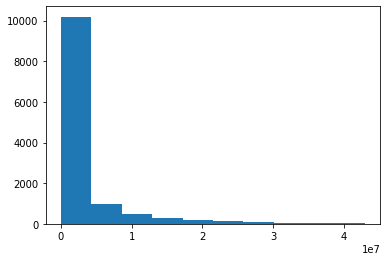

In [14]:
#histogramm of continious nummerical variables
num_bins=10
plt.hist(df_clean['funding_total_usd'],num_bins)

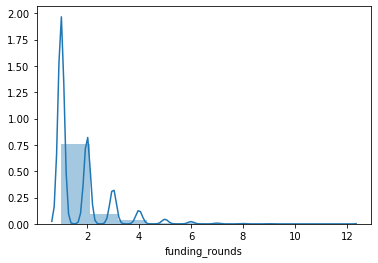

In [15]:
#pdfs
sns.distplot(df_clean['funding_rounds'],bins=10)

In [16]:
df_num=df.select_dtypes(include=['int64'])
df_num.head()

,funding_total_usd,funding_rounds,founded_year,Company age
0,1750000,1,2012,2
1,40000,1,2012,2
2,1500000,1,2011,3
3,40000,1,2012,2
4,4400000,2,2013,1


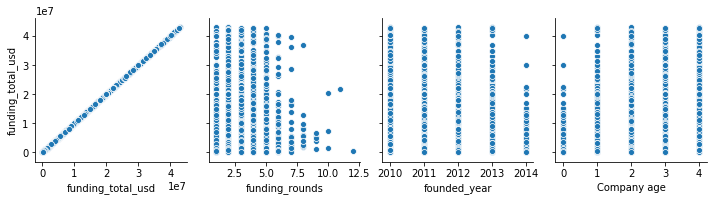

In [17]:
#plot correlation
for i in range(0,len(df_num.columns),5):
    sns.pairplot(df_num,y_vars=['funding_total_usd'],x_vars=df_num.columns[i:i+5])